## Import necessary libraries

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Load the dataset

In [114]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv(r'C:\Users\ahmed\Desktop\AI&DataScience\Scikit-learn\Data\Pokemon.csv')

## Explore the dataset

In [115]:
# Visualize the first ten rows of the dataset
df.head()

,Name,Type 1,Type 2,Total Point,Health Point,Attack Point,Defense Point,Sp. Atk Point,Sp. Def Point,Speed Point,Generation
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1


In [116]:
# Visualize the last ten rows of the dataframe
df.tail()

,Name,Type 1,Type 2,Total Point,Health Point,Attack Point,Defense Point,Sp. Atk Point,Sp. Def Point,Speed Point,Generation
51,Paras,Bug,Grass,285,35,70,55,45,55,25,1
52,Parasect,Bug,Grass,405,60,95,80,60,80,30,1
53,Venonat,Bug,Poison,305,60,55,50,40,55,45,1
54,Venomoth,Bug,Poison,450,70,65,60,90,75,90,1
55,Diglett,Ground,NaN,265,10,55,25,35,45,95,1


In [117]:
# Dataset size
df.shape

(56, 11)

In [118]:
# Check the names of existing Pokemon
df['Name']

0                     Bulbasaur
1                       Ivysaur
2                      Venusaur
3         VenusaurMega Venusaur
4                    Charmander
5                    Charmeleon
6                     Charizard
7     CharizardMega Charizard X
8     CharizardMega Charizard Y
9                      Squirtle
10                    Wartortle
11                    Blastoise
12      BlastoiseMega Blastoise
13                     Caterpie
14                      Metapod
15                   Butterfree
16                       Weedle
17                       Kakuna
18                     Beedrill
19        BeedrillMega Beedrill
20                       Pidgey
21                    Pidgeotto
22                      Pidgeot
23          PidgeotMega Pidgeot
24                      Rattata
25                     Raticate
26                      Spearow
27                       Fearow
28                        Ekans
29                        Arbok
30                      Pikachu
31      

In [119]:
# Check the types of existing Pokemon
# Get unique types from the 'Type 1' and 'Type 2' columns
tipos = pd.unique(df[['Type 1', 'Type 2']].values.ravel())

# Show unique types
print(tipos)

['Grass' 'Poison' 'Fire' nan 'Flying' 'Dragon' 'Water' 'Bug' 'Normal'
 'Electric' 'Ground' 'Fairy']


In [120]:
# Basic statistics of the dataset
df.describe(include='all')

,Name,Type 1,Type 2,Total Point,Health Point,Attack Point,Defense Point,Sp. Atk Point,Sp. Def Point,Speed Point,Generation
count,56,56,31,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0
unique,56,9,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Bulbasaur,Bug,Poison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,11,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,390.714286,61.875000,69.196429,61.785714,65.142857,64.982143,67.732143,1.0
std,NaN,NaN,NaN,119.781728,21.734817,24.774928,23.425483,32.938747,24.795521,26.458538,0.0
min,NaN,NaN,NaN,195.000000,10.000000,20.000000,20.000000,15.000000,20.000000,20.000000,1.0
25%,NaN,NaN,NaN,296.250000,45.000000,51.500000,43.750000,40.000000,50.000000,45.000000,1.0
50%,NaN,NaN,NaN,395.000000,60.000000,65.000000,57.500000,60.000000,65.000000,65.000000,1.0
75%,NaN,NaN,NaN,483.500000,75.750000,83.250000,77.250000,85.000000,80.000000,86.250000,1.0


In [121]:
# Information about missing values
df.isnull().sum()

Name              0
Type 1            0
Type 2           25
Total Point       0
Health Point      0
Attack Point      0
Defense Point     0
Sp. Atk Point     0
Sp. Def Point     0
Speed Point       0
Generation        0
dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           56 non-null     object
 1   Type 1         56 non-null     object
 2   Type 2         31 non-null     object
 3   Total Point    56 non-null     int64 
 4   Health Point   56 non-null     int64 
 5   Attack Point   56 non-null     int64 
 6   Defense Point  56 non-null     int64 
 7   Sp. Atk Point  56 non-null     int64 
 8   Sp. Def Point  56 non-null     int64 
 9   Speed Point    56 non-null     int64 
 10  Generation     56 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 4.9+ KB


## Fill in missing values

In [123]:
# Select columns with data types 'float64' or 'int64' (Numerical)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 'numeric_cols' now contains the names of columns with 'float64' or 'int64' data types
numeric_cols

Index(['Total Point', 'Health Point', 'Attack Point', 'Defense Point',
       'Sp. Atk Point', 'Sp. Def Point', 'Speed Point', 'Generation'],
      dtype='object')

In [124]:
# Select columns with data types 'object' or 'category'
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# 'categorical_cols' now contains the names of columns with 'object' or 'category' data types
categorical_cols

Index(['Name', 'Type 1', 'Type 2'], dtype='object')

In [125]:
# Create an imputer for numerical values using median as the imputation strategy
imputer_num = SimpleImputer(strategy='median')

# Apply imputation to the numerical columns of the DataFrame
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

In [126]:
# Create a SimpleImputer for categorical values using the 'most_frequent' strategy
imputer_cat = SimpleImputer(strategy='most_frequent')

# Apply imputation to the categorical columns of the DataFrame
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

In [127]:
# Check information about missing values
print(df.isnull().sum())

Name             0
Type 1           0
Type 2           0
Total Point      0
Health Point     0
Attack Point     0
Defense Point    0
Sp. Atk Point    0
Sp. Def Point    0
Speed Point      0
Generation       0
dtype: int64


 ## Encoding

In [128]:
# Apply encoding to categorical variables in the DataFrame
df_dummies = pd.get_dummies(df, drop_first=True)

df_dummies.head()

,Total Point,Health Point,Attack Point,Defense Point,Sp. Atk Point,Sp. Def Point,Speed Point,Generation,Name_Beedrill,Name_BeedrillMega Beedrill,...,Type 1_Grass,Type 1_Ground,Type 1_Normal,Type 1_Poison,Type 1_Water,Type 2_Fairy,Type 2_Flying,Type 2_Grass,Type 2_Ground,Type 2_Poison
0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,625.0,80.0,100.0,123.0,122.0,120.0,80.0,1.0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,309.0,39.0,52.0,43.0,60.0,50.0,65.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [129]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Total Point                     56 non-null     float64
 1   Health Point                    56 non-null     float64
 2   Attack Point                    56 non-null     float64
 3   Defense Point                   56 non-null     float64
 4   Sp. Atk Point                   56 non-null     float64
 5   Sp. Def Point                   56 non-null     float64
 6   Speed Point                     56 non-null     float64
 7   Generation                      56 non-null     float64
 8   Name_Beedrill                   56 non-null     uint8  
 9   Name_BeedrillMega Beedrill      56 non-null     uint8  
 10  Name_Blastoise                  56 non-null     uint8  
 11  Name_BlastoiseMega Blastoise    56 non-null     uint8  
 12  Name_Bulbasaur                  56 non

## EDA

Univariate visualization

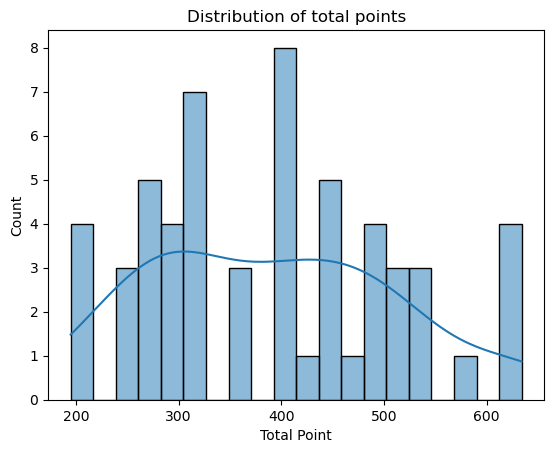

In [130]:
sns.histplot(df_dummies['Total Point'], bins=20, kde=True)
plt.title('Distribution of total points')
plt.show()

Multivariate visualization

<Figure size 800x700 with 0 Axes>

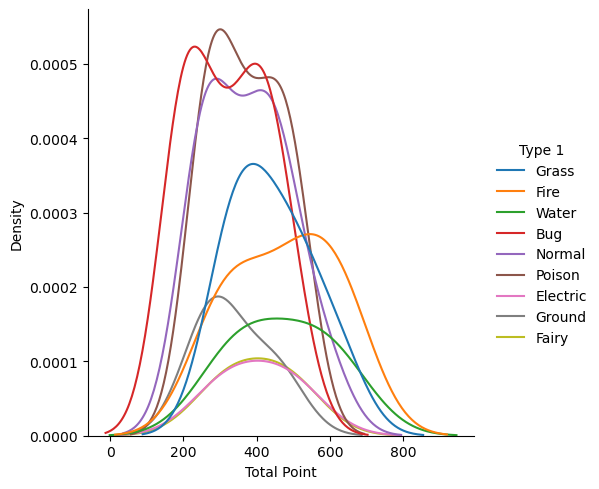

In [131]:
# Create a density plot (KDE) for the "Total point" column, differentiating by the "Type 1" category
plt.figure(figsize=(8,7))
sns.displot(df, x="Total Point", hue="Type 1", kind="kde")
plt.show()

c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 800x700 with 0 Axes>

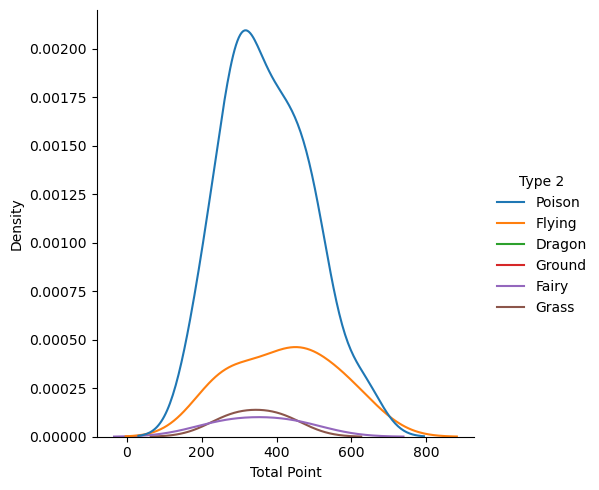

In [132]:
# Create a density plot (KDE) for the "Total point" column, differentiating by the "Type 2" category
plt.figure(figsize=(8,7))
sns.displot(df, x="Total Point", hue="Type 2", kind="kde")
plt.show()

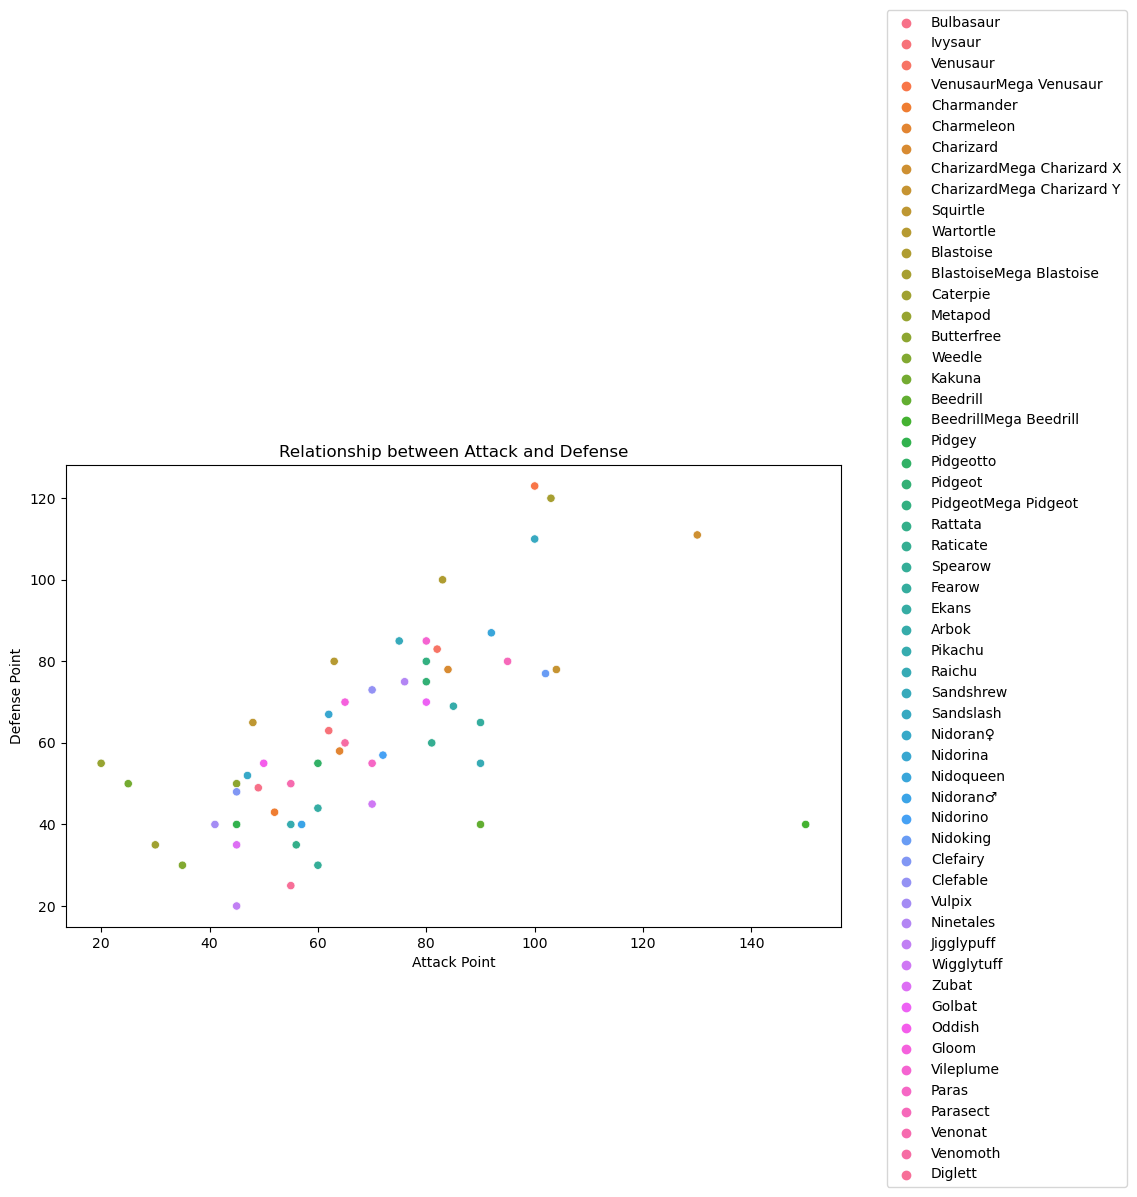

In [133]:
# Visualization of the relationship between attack and defense by name
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Attack Point', y='Defense Point', hue='Name')
# Adjust the position of the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 2), loc='upper left')
plt.title('Relationship between Attack and Defense')
plt.show()

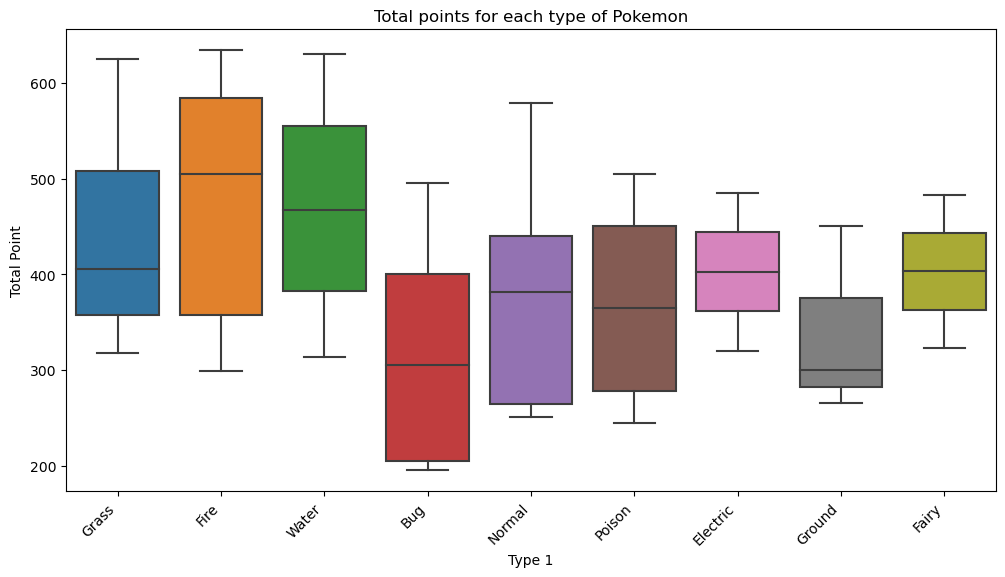

In [134]:
# Visualization of the distribution of total points for each type of Pokemon
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Type 1', y='Total Point')
plt.title('Total points for each type of Pokemon')
plt.xticks(rotation=45, ha='right')
plt.show()

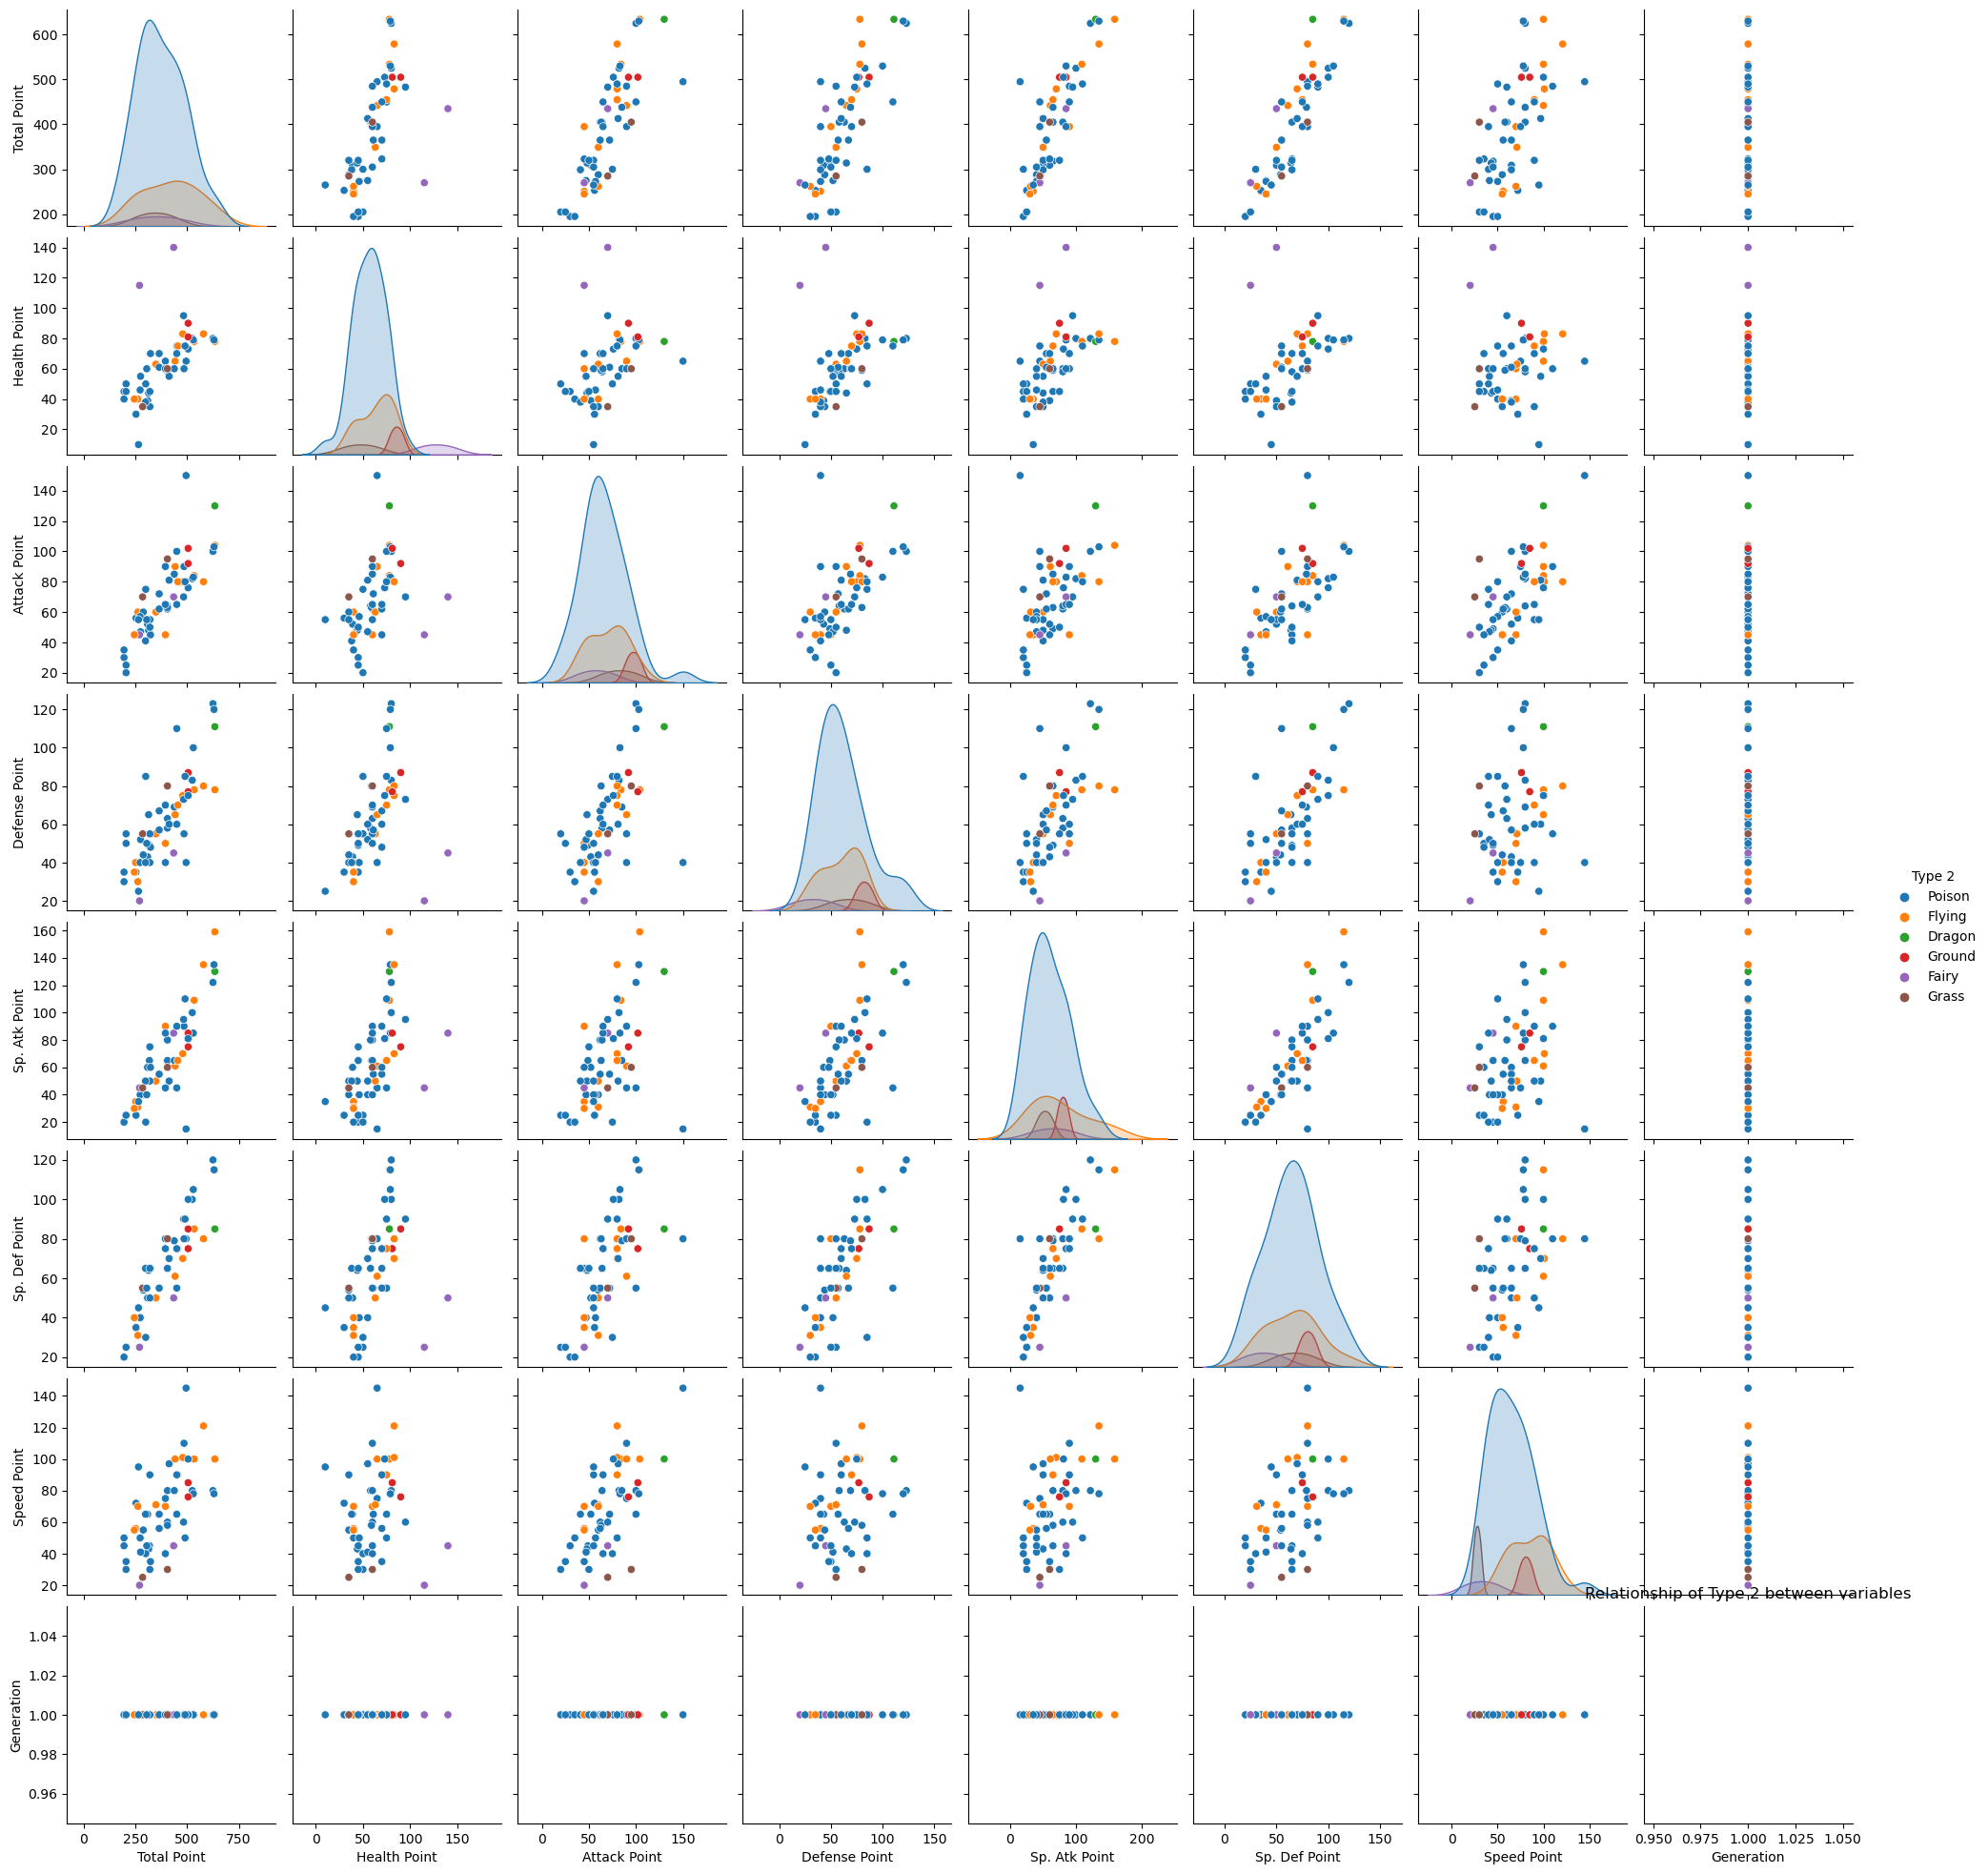

In [135]:
sns.pairplot(df, hue='Type 2')
plt.title('Relationship of Type 2 between variables')
plt.show()

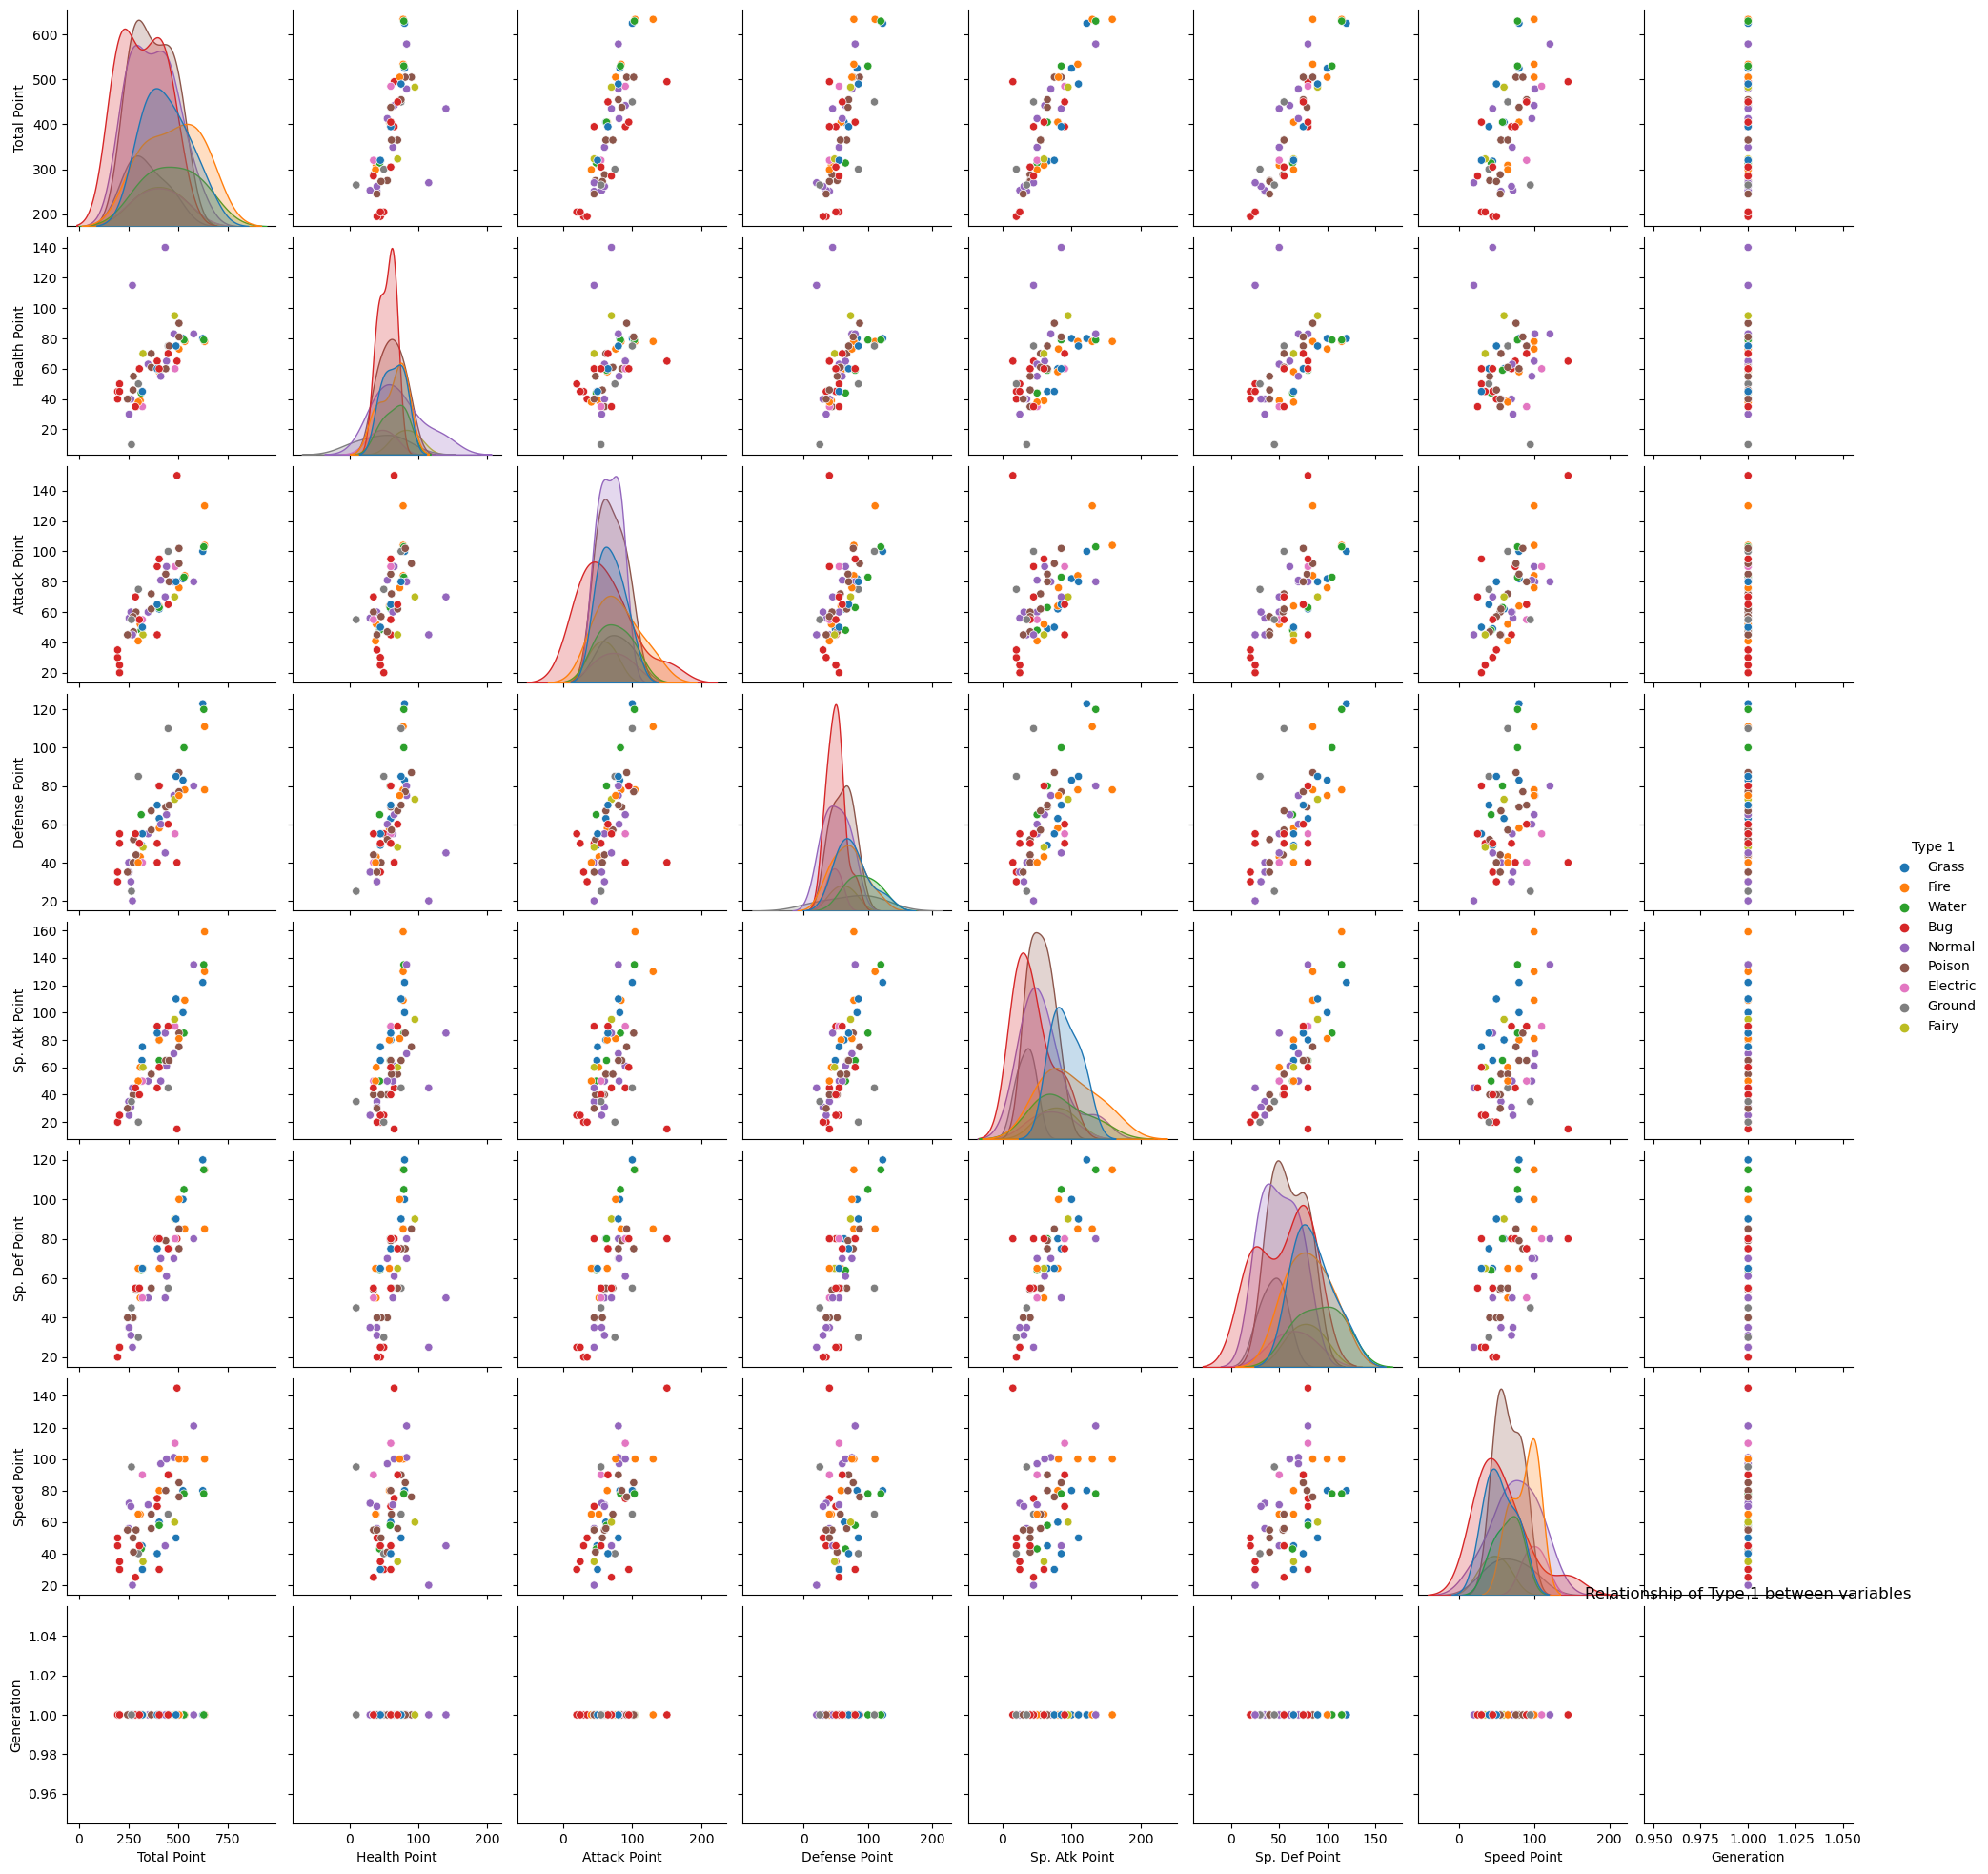

In [136]:
sns.pairplot(df, hue='Type 1')
plt.title('Relationship of Type 1 between variables')
plt.show()

Text(0.5, 1.02, 'Correlation between variables')

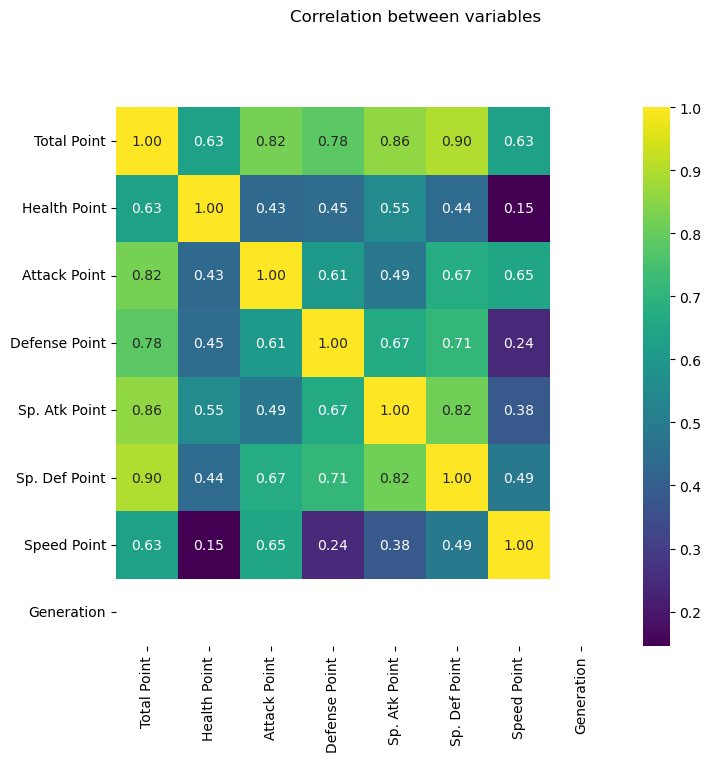

In [137]:
# Create a heatmap of the correlation between numerical variables
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), annot=True, cmap="viridis", fmt=".2f")
plt.suptitle("Correlation between variables", y=1.02)

## Create a regression model with scikit-learn

In [138]:
# Prepare X and Y
X = df_dummies.drop('Total Point', axis=1)
y = df_dummies['Total Point']


In [139]:
X.head()

,Health Point,Attack Point,Defense Point,Sp. Atk Point,Sp. Def Point,Speed Point,Generation,Name_Beedrill,Name_BeedrillMega Beedrill,Name_Blastoise,...,Type 1_Grass,Type 1_Ground,Type 1_Normal,Type 1_Poison,Type 1_Water,Type 2_Fairy,Type 2_Flying,Type 2_Grass,Type 2_Ground,Type 2_Poison
0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,80.0,100.0,123.0,122.0,120.0,80.0,1.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,39.0,52.0,43.0,60.0,50.0,65.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [140]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Make predictions on the test set

In [142]:
# Make predictions on the test set
y_pred = model.predict(X_test)

## Evaluate the model

In [143]:
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Absolute Error: 0.0019315479419598585
Mean Squared Error: 5.555205557288577e-06
R^2 Score: 0.9999999996886981
